In [1]:
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

import numpy as np
import pandas as pd

In [2]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (12, 6)
#mpl.rcParams['font.size'] = 14
#mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['hatch.linewidth'] = 0.5
%config InlineBackend.figure_formats = ['svg']

# Visualização

Dataset: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [3]:
cidades = ['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas', 'Belo Horizonte']
colunas_nao_binarias = ['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'y con + alu']
coluna_y = 'y con + alu'

dataset = pd.read_csv('housesToRentProcessed.csv', index_col=0)
dataset_cidades = dataset.copy()
dataset_cidades['cidades'] = ''


for cidade in cidades:
    dataset_cidades.loc[dataset_cidades[cidade] == 1, 'cidade'] = cidade

In [4]:
#color_cidades = sns.color_palette("viridis", 9)[::-1]
#color_cidades = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
color_cidades = ['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4']
patterns = ["." , "o" , "x" , "/" , "+" ]

## Describe

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
São Paulo,10686.0,0.550627,0.497454,0.0,0.0,1.0,1.00,1.0
Porto Alegre,10686.0,0.111641,0.314939,0.0,0.0,0.0,0.00,1.0
Rio de Janeiro,10686.0,0.140371,0.347387,0.0,0.0,0.0,0.00,1.0
Campinas,10686.0,0.079824,0.271033,0.0,0.0,0.0,0.00,1.0
Belo Horizonte,10686.0,0.117537,0.322074,0.0,0.0,0.0,0.00,1.0
area,10686.0,149.145424,537.135346,11.0,56.0,90.0,182.00,46335.0
rooms,10686.0,2.505989,1.170896,1.0,2.0,2.0,3.00,13.0
bathroom,10686.0,2.235729,1.406223,1.0,1.0,2.0,3.00,10.0
parking spaces,10686.0,1.608740,1.588363,0.0,0.0,1.0,2.00,12.0
floor,10686.0,5.298989,5.890053,1.0,1.0,3.0,8.00,301.0


## Dados ausentes

In [6]:
def m_data(data):
    '''
    Referência:
    Célula 7
    https://www.kaggle.com/erickjbgarcia/eda-python-introduction-course#2.-Cleaning-dataset
    '''
    m_data = data.isnull().sum() #total de null    
    total = m_data.sort_values(ascending=True) #ordenação 
    percent = (m_data / len(data.index)*100).round(2).sort_values(ascending=True) #cálculo percentual
    m_table = pd.concat([total, percent], axis=1, keys=['Qty DA', '% DA'])
    return m_table.tail(13)

print('Sem dados ausentes')
m_data(dataset)

Sem dados ausentes


,Qty DA,% DA
Porto Alegre,0,0.0
Rio de Janeiro,0,0.0
Campinas,0,0.0
Belo Horizonte,0,0.0
area,0,0.0
rooms,0,0.0
bathroom,0,0.0
parking spaces,0,0.0
floor,0,0.0
isHouse,0,0.0


## Top x

In [7]:
print('Top 10 mais caros')
dataset.sort_values([coluna_y], ascending=False).head(10)

Top 10 mais caros


,São Paulo,Porto Alegre,Rio de Janeiro,Campinas,Belo Horizonte,area,rooms,bathroom,parking spaces,floor,isHouse,animal,furniture,y con + alu
1444,0,1,0,0,0,42,1,1,0,10,0,1,0,32700
7748,1,0,0,0,0,350,3,3,3,1,1,1,0,30000
6185,1,0,0,0,0,455,4,5,4,5,0,1,0,28000
1213,1,0,0,0,0,850,6,7,4,1,1,0,0,28000
974,1,0,0,0,0,600,6,7,4,1,1,1,1,25000
6947,1,0,0,0,0,486,8,4,6,1,1,1,0,25000
547,1,0,0,0,0,580,5,5,4,4,0,1,0,24900
2619,1,0,0,0,0,80,2,1,1,1,0,1,0,24875
157,1,0,0,0,0,660,4,5,5,12,0,1,1,24800
1253,1,0,0,0,0,315,3,5,2,14,0,0,0,24300


In [8]:
print('Top 10 maiores')
dataset.sort_values(['area'], ascending=False).head(10)

Top 10 maiores


,São Paulo,Porto Alegre,Rio de Janeiro,Campinas,Belo Horizonte,area,rooms,bathroom,parking spaces,floor,isHouse,animal,furniture,y con + alu
2397,0,0,0,0,1,46335,4,8,5,11,0,1,1,9460
5915,1,0,0,0,0,24606,5,4,4,12,0,1,0,10354
9241,0,0,0,1,0,12732,3,2,0,3,0,1,0,2300
5129,0,0,0,0,1,2000,4,2,3,1,1,1,0,4956
8790,0,0,0,0,1,2000,3,3,2,2,0,1,1,8000
654,1,0,0,0,0,1600,6,6,6,1,1,1,1,7600
4813,1,0,0,0,0,1600,4,5,12,1,1,1,0,6901
3559,1,0,0,0,0,1100,4,6,10,1,1,1,0,17000
2423,0,0,0,0,1,1020,5,4,6,1,1,1,1,6520
6615,0,0,0,0,1,1000,5,4,3,15,0,1,0,8255


In [9]:
print('Top 10 andares')
dataset.sort_values(['floor'], ascending=False).head(10)

Top 10 andares


,São Paulo,Porto Alegre,Rio de Janeiro,Campinas,Belo Horizonte,area,rooms,bathroom,parking spaces,floor,isHouse,animal,furniture,y con + alu
2562,0,0,0,0,1,80,3,2,2,301,0,1,0,3350
5694,0,0,0,1,0,64,2,2,2,51,0,1,0,2700
1654,1,0,0,0,0,353,4,5,5,46,0,1,0,13000
671,1,0,0,0,0,250,3,2,3,35,0,1,1,17500
10179,1,0,0,0,0,51,1,1,0,32,0,0,0,3679
6096,1,0,0,0,0,84,2,3,2,32,0,0,1,9350
5989,1,0,0,0,0,98,2,2,2,29,0,1,0,9950
2522,1,0,0,0,0,77,1,2,1,29,0,1,1,8490
2709,1,0,0,0,0,105,1,1,2,29,0,0,0,10000
4389,1,0,0,0,0,292,4,4,4,29,0,1,0,6700


## Distribuição do preço do aluguel

Text(0, 0.5, 'Preço (R$)')

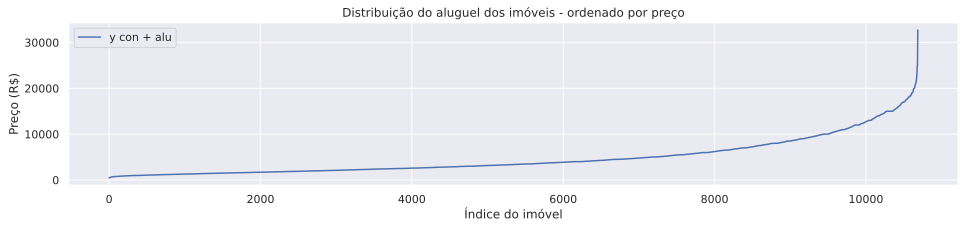

In [10]:
ax = dataset.sort_values(by=coluna_y).reset_index()[[coluna_y]].plot(title='Distribuição do aluguel dos imóveis - ordenado por preço', figsize=(16, 3))
#ax = dataset[['y con + alu']].plot(title='Distribuição do aluguel das casas')
ax.set_xlabel("Índice do imóvel")
ax.set_ylabel("Preço (R$)")

Text(0, 0.5, 'Preço (R$)')

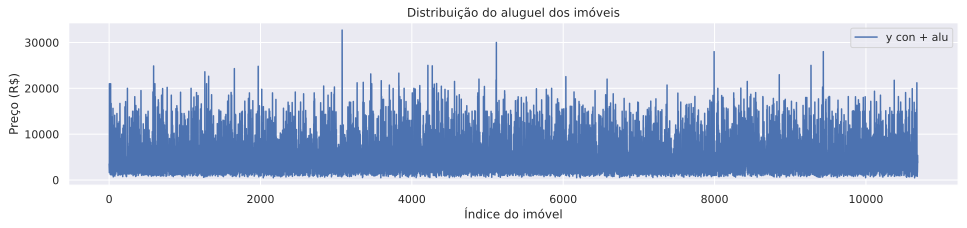

In [11]:
ax = dataset.reset_index()[[coluna_y]].plot(title='Distribuição do aluguel dos imóveis', figsize=(16, 3))
ax.set_xlabel("Índice do imóvel")
ax.set_ylabel("Preço (R$)")

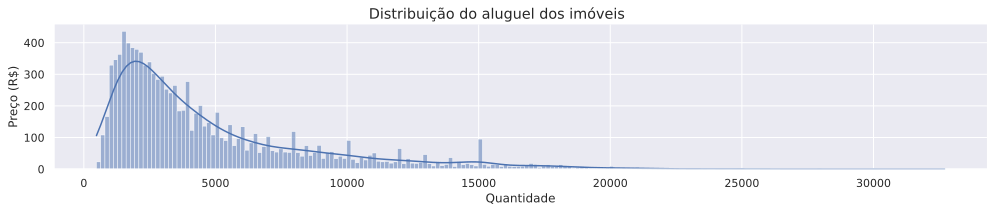

In [12]:
#ax = dataset[['y con + alu']].plot.hist(bins=200, title='Distribuição do aluguel dos imóveis', figsize=(16, 3))
# ax.set_ylabel("Proporção de imóveis")

g = sns.displot(dataset[coluna_y], bins=200, kde=True, height=3, aspect=14/3)
g.set_axis_labels("Quantidade", "Preço (R$)")
g.fig.suptitle('Distribuição do aluguel dos imóveis')
g.fig.subplots_adjust(top=0.9)

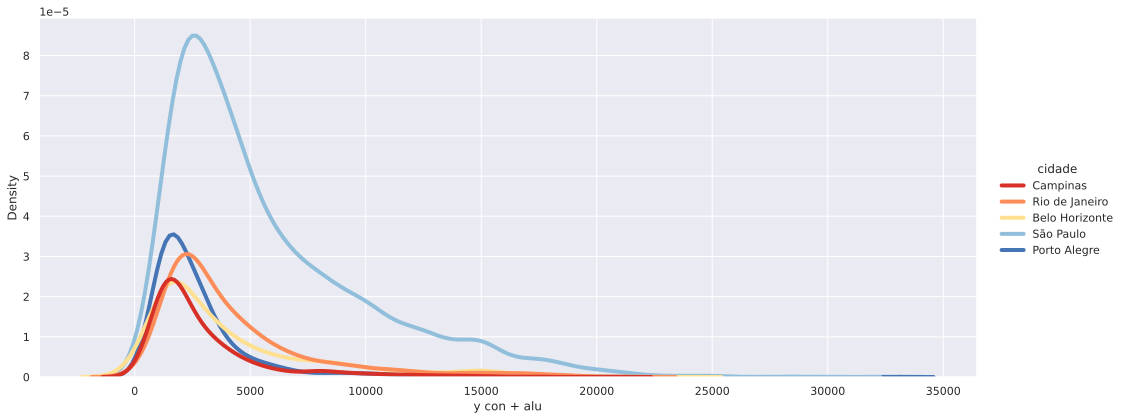

In [13]:
g = sns.displot(
    data=dataset_cidades, x=coluna_y, hue="cidade", kind="kde", height=6, aspect=14/6, palette=color_cidades[:5],
    linewidth=4
)

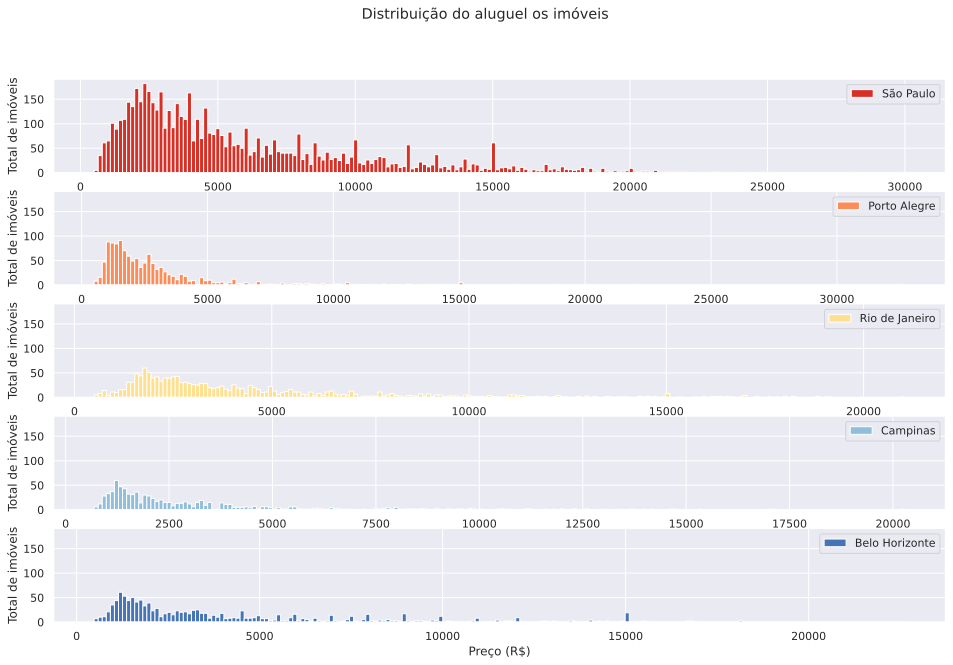

In [14]:
fig, axs = plt.subplots(len(cidades), figsize=(16, 2*len(cidades)), sharey=True)
fig.suptitle(f'Distribuição do aluguel os imóveis')

for cidade, ax, color in zip(cidades, axs, color_cidades):
    data = dataset[dataset[cidade] == 1]
    data[[coluna_y]].plot.hist(bins=200, ax=ax, color=color)
    ax.set_xlabel("Preço (R$)")
    ax.set_ylabel("Total de imóveis")
    ax.legend([cidade])

<AxesSubplot:title={'center':'Área dos imóveis'}>

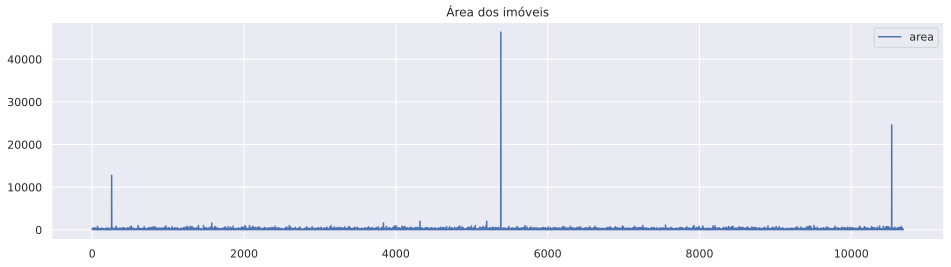

In [15]:
dataset.reset_index()[['area']].plot(title='Área dos imóveis', figsize=(16, 4))

<AxesSubplot:title={'center':'Preço do metro quadrado'}>

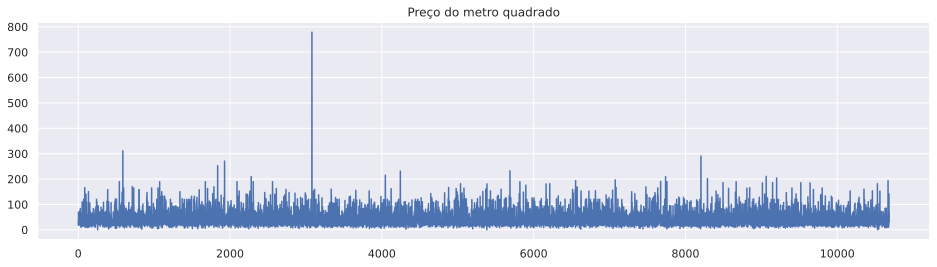

In [16]:
(dataset.reset_index()[coluna_y]/dataset.reset_index()['area']).plot(title='Preço do metro quadrado', figsize=(16, 4))

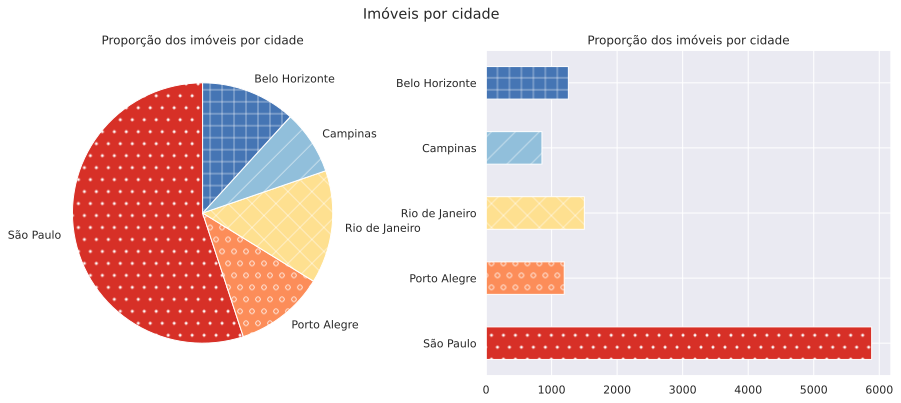

In [17]:
proporcao_cidades = [len(dataset[dataset[cidade] == 1]) for cidade in cidades]
dados_cidades = pd.DataFrame(proporcao_cidades, index=cidades, columns=['Total'])

#####

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Imóveis por cidade')

ax1, ax2 = axs.flatten()
dados_cidades.plot.pie(title="Proporção dos imóveis por cidade", y='Total', startangle=90, colors=color_cidades, legend=False, ylabel='', ax=ax1)

for bar, hatch, color in zip(ax1.patches, patterns, color_cidades):
    bar.set_hatch(hatch)
    
ax2 = dados_cidades.plot.barh(title="Proporção dos imóveis por cidade", hatch=patterns, color=color_cidades, legend=False, ax=ax2)
for bar, hatch, color in zip(ax2.patches, patterns, color_cidades):
    bar.set_fc(color)
    bar.set_hatch(hatch)

## Correlação entre os dados

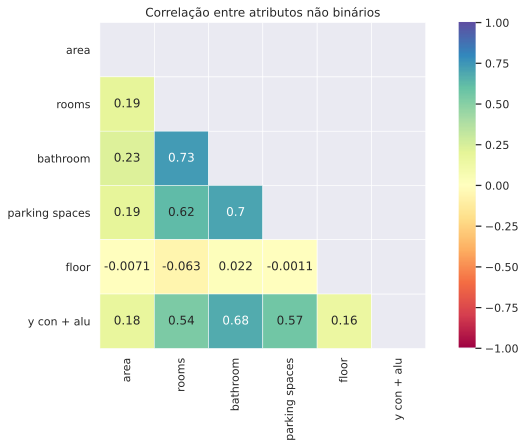

In [18]:
def plot_matriz_correlacao(dataset, **kwargs):
    correlacao = dataset.corr()
    ax = sns.heatmap(
        correlacao,
        cmap="Spectral", 
        center=0, vmin=-1, vmax=1,
        linewidth=+.5, linecolor='w', mask=np.triu(correlacao),
        annot=True,
        #annot_kws={"size": 9}
        **kwargs
    )
    ax.set_title('Correlação entre atributos não binários')

plot_matriz_correlacao(dataset[colunas_nao_binarias], square=True)

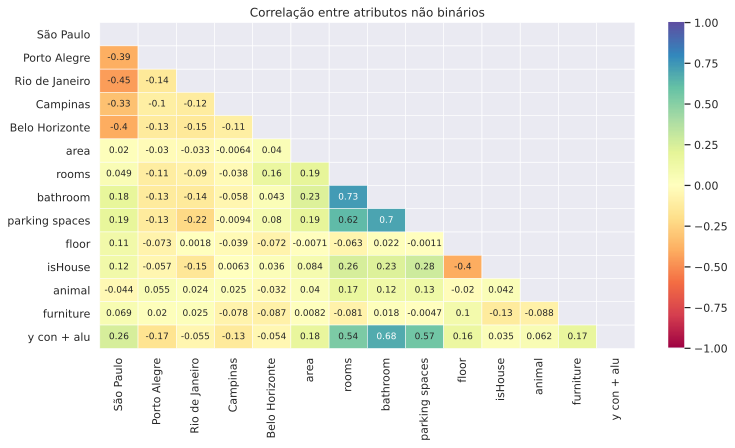

In [19]:
plot_matriz_correlacao(dataset, square=False, annot_kws={"size": 9})

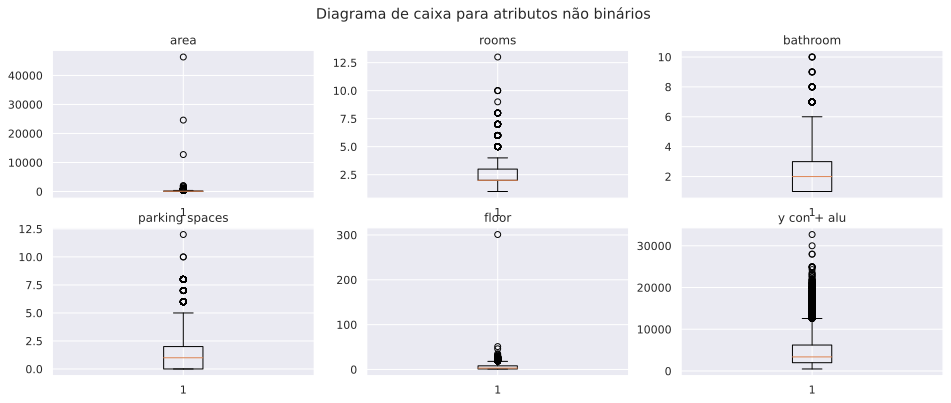

In [20]:
fig, axis = plt.subplots(2, 3, figsize=(16, 6))
fig.suptitle(f'Diagrama de caixa para atributos não binários')

for coluna, ax in zip(colunas_nao_binarias, axis.flatten()):
    ax.boxplot(dataset[coluna])
    ax.set_title(coluna)


https://www.kaggle.com/shakibyz/eda-on-brazilian-houses-to-rent#Boxplot-of-Rent-amount-by-(Parking-spaces,-Bathroom,-Room,-City)
Boxplot of Rent amount by (Parking spaces, Bathroom, Room, City)

    Does housing rent increases when the # of bathrooms increases?
    Does housing rent increases when the # of rooms increases?
    Does housing rent increases when the # of parking spaces increases?



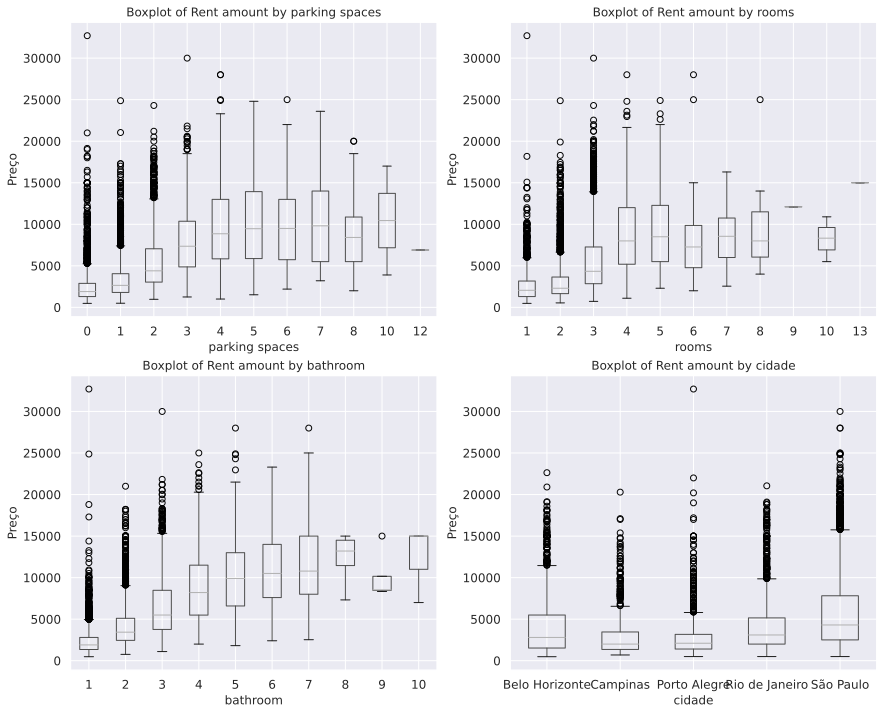

In [21]:
print('''
https://www.kaggle.com/shakibyz/eda-on-brazilian-houses-to-rent#Boxplot-of-Rent-amount-by-(Parking-spaces,-Bathroom,-Room,-City)
Boxplot of Rent amount by (Parking spaces, Bathroom, Room, City)

    Does housing rent increases when the # of bathrooms increases?
    Does housing rent increases when the # of rooms increases?
    Does housing rent increases when the # of parking spaces increases?
''')
list_of_metrics = [['parking spaces','rooms'], ['bathroom', 'cidade']]

def box_plot_func(ax, metric):
    dataset_cidades.boxplot(column=coluna_y, by=f'{metric}', fontsize=12, ax=ax);
    ax.set_title("Boxplot of Rent amount by " + f"{metric}")
    ax.set_xlabel(f"{metric}")
    ax.set_ylabel('Preço')
    plt.suptitle("")

    
fig, axes = plt.subplots(2,2, figsize=(14, 12))

box_plot_func(axes[0,0], list_of_metrics[0][0])
box_plot_func(axes[0,1], list_of_metrics[0][1])
box_plot_func(axes[1,0], list_of_metrics[1][0])
box_plot_func(axes[1,1], list_of_metrics[1][1])

In [22]:
#Travou
#sns.pairplot(dataset[set(dataset.columns) - set(cidades)])